### Отбор наиболее важных признаков при помощи метода случайного леса

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from russian_names import russian_names

In [2]:
df_pr = pd.read_csv('data_processed.csv')
df_pr.head(10)

,Unnamed: 0,Marital status,Application mode,Application order,Course,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Units 1 approved,Units 1 grade,Units 1 non_eval,Units 2 credited,Units 2 enrolled,Units 2 evaluations,Units 2 approved,Units 2 grade,Units 2 non_eval,Target
0,0,1,8,0.555556,2,1,13,4,6,10,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,1
1,1,1,2,0.111111,11,1,1,3,4,4,...,0.230769,0.741722,0.0,0.0,0.260870,0.181818,0.30,0.735897,0.000000,0
2,2,1,1,0.555556,5,1,22,27,10,10,...,0.000000,0.000000,0.0,0.0,0.260870,0.000000,0.00,0.000000,0.000000,1
3,3,1,8,0.222222,15,1,23,27,6,4,...,0.230769,0.711447,0.0,0.0,0.260870,0.303030,0.25,0.667692,0.000000,0
4,4,2,12,0.111111,3,1,22,28,10,10,...,0.192308,0.653422,0.0,0.0,0.260870,0.181818,0.30,0.700000,0.000000,0
5,5,2,12,0.111111,17,12,22,27,10,8,...,0.192308,0.628193,0.0,0.0,0.217391,0.515152,0.25,0.619231,0.416667,0
6,6,1,1,0.111111,12,1,13,28,8,11,...,0.269231,0.704636,0.0,0.0,0.347826,0.242424,0.40,0.772423,0.000000,0
7,7,1,9,0.444444,11,1,22,27,10,10,...,0.000000,0.000000,0.0,0.0,0.217391,0.151515,0.00,0.000000,0.000000,1
8,8,1,1,0.333333,10,1,1,1,10,10,...,0.230769,0.735099,0.0,0.0,0.260870,0.212121,0.30,0.761538,0.000000,0
9,9,1,1,0.111111,10,1,1,14,5,8,...,0.192308,0.603974,0.0,0.0,0.260870,0.424242,0.10,0.726923,0.000000,1


In [3]:
df_pr = df_pr.drop('Unnamed: 0', axis=1)
df_pr

,Marital status,Application mode,Application order,Course,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,...,Units 1 approved,Units 1 grade,Units 1 non_eval,Units 2 credited,Units 2 enrolled,Units 2 evaluations,Units 2 approved,Units 2 grade,Units 2 non_eval,Target
0,1,8,0.555556,2,1,13,4,6,10,1,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.0,1
1,1,2,0.111111,11,1,1,3,4,4,1,...,0.230769,0.741722,0.0,0.0,0.260870,0.181818,0.30,0.735897,0.0,0
2,1,1,0.555556,5,1,22,27,10,10,1,...,0.000000,0.000000,0.0,0.0,0.260870,0.000000,0.00,0.000000,0.0,1
3,1,8,0.222222,15,1,23,27,6,4,1,...,0.230769,0.711447,0.0,0.0,0.260870,0.303030,0.25,0.667692,0.0,0
4,2,12,0.111111,3,1,22,28,10,10,0,...,0.192308,0.653422,0.0,0.0,0.260870,0.181818,0.30,0.700000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,0.666667,15,1,1,1,6,5,0,...,0.192308,0.720530,0.0,0.0,0.260870,0.242424,0.25,0.682051,0.0,0
4420,1,1,0.222222,15,1,1,1,10,10,1,...,0.230769,0.635762,0.0,0.0,0.260870,0.181818,0.10,0.592308,0.0,1
4421,1,1,0.111111,12,1,22,27,10,10,1,...,0.269231,0.790066,0.0,0.0,0.347826,0.272727,0.05,0.726923,0.0,1
4422,1,1,0.111111,9,1,22,27,8,5,1,...,0.192308,0.731126,0.0,0.0,0.217391,0.181818,0.25,0.646154,0.0,0


Разделение на 4 выборки: 70%, 15%, 10%, 5%.

In [4]:
X = df_pr.copy()
# Отделить целевую переменную и записать ее в y
X = X.drop('Target', axis=1)
y = df_pr['Target']

In [5]:
# Делим на 80 и 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
# От train отделяем 1/8 => train - 70%, val - 10%
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42, stratify=y_train)

In [7]:
# От test отделяем 1/4 => test - 15%, new - 5%
X_test, X_new, y_test, y_new = train_test_split(X_test, y_test, test_size=0.25, random_state=42, stratify=y_test)

In [8]:
# Проверка
splits = {
    'Обучающая': X_train,
    'Тестовая': X_test,
    'Валидационная': X_val,
    'Новые данные': X_new,
}

for name, split in splits.items():
    n = len(split)
    perc = n / len(X) * 100
    print(f'{name}: {n} строк, {perc:.1f} %')

Обучающая: 3096 строк, 70.0 %
Тестовая: 663 строк, 15.0 %
Валидационная: 443 строк, 10.0 %
Новые данные: 222 строк, 5.0 %


In [9]:
clf = RandomForestClassifier(n_estimators=100)
# Обучение модели
clf.fit(X_train,y_train)
# Вынести отсортированное влияние признаков
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Units 2 approved           0.176136
Units 2 grade              0.132533
Units 1 grade              0.082740
Units 1 approved           0.077552
Tuition fees up to date    0.073978
Age at enrollment          0.052895
Course                     0.039794
Units 2 evaluations        0.035815
Father's occupation        0.035377
Units 1 evaluations        0.034967
Mother's occupation        0.028682
Mother's qualification     0.026109
Father's qualification     0.025812
Application mode           0.025476
Units 2 enrolled           0.024524
Units 1 enrolled           0.022920
Debtor                     0.018952
Application order          0.015318
Scholarship holder         0.013214
Gender                     0.011947
Displaced                  0.008771
Units 1 credited           0.007498
Previous qualification     0.007225
Units 2 non_eval           0.006613
Units 2 credited           0.006165
Units 1 non_eval           0.004990
Marital status             0.003998
dtype: float64

Визуализация важности признаков

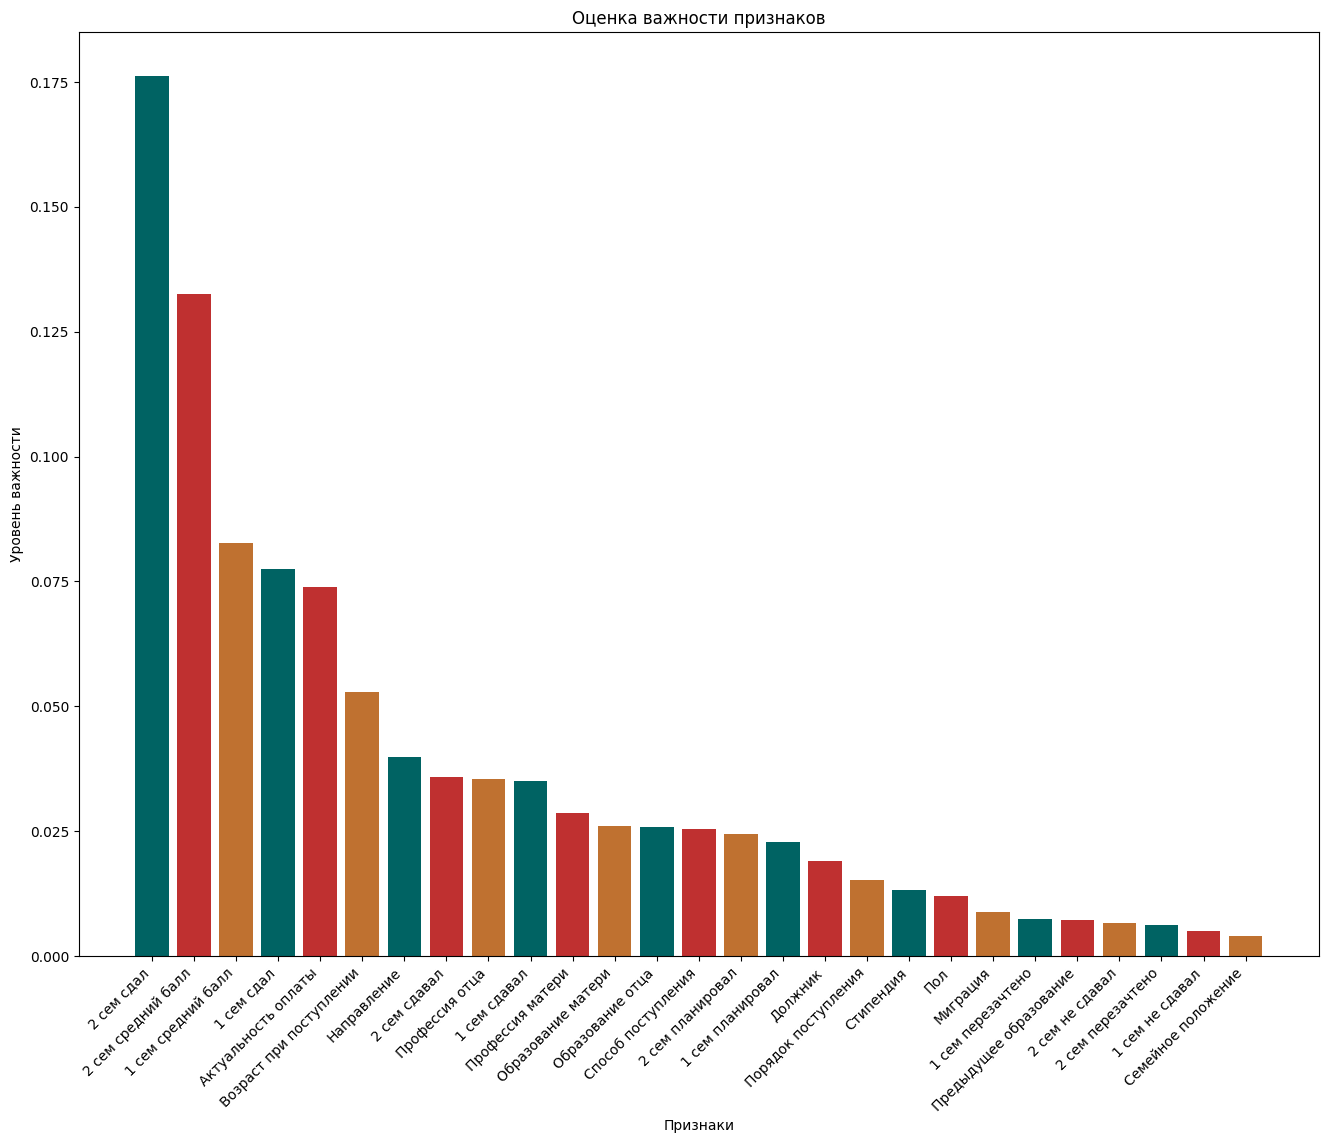

In [10]:
color=['#006363', '#BF3030', '#BF7130']
labels = [russian_names[column] for column in feature_imp.index]

plt.figure(figsize=(16,12))
plt.bar(feature_imp.index, feature_imp, color=color)

plt.title('Оценка важности признаков')
plt.xlabel('Признаки')
plt.ylabel('Уровень важности')

plt.xticks(np.arange(len(labels)), labels, rotation=45, ha='right')

plt.show()

Удаляем ненужные признаки из всех трех выборок

In [11]:
list_to_drop = ['Displaced', 'Previous qualification', 'Units 2 credited', 'Units 1 credited',
                'Units 2 non_eval', 'Units 1 non_eval', 'Marital status']

In [12]:
X_train = X_train.drop(columns=list_to_drop)
X_test = X_test.drop(columns=list_to_drop)
X_val = X_val.drop(columns=list_to_drop)

### Обучение леса деревьев

In [13]:
# Классификатор на 300 деревьев для большей точности
clf = RandomForestClassifier(n_estimators=300)
clf.fit(X_train, y_train)
# Предсказание меток классов
y_pred = clf.predict(X_val)

# Основные метрики
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       301
           1       0.80      0.65      0.72       142

    accuracy                           0.84       443
   macro avg       0.82      0.79      0.80       443
weighted avg       0.83      0.84      0.83       443



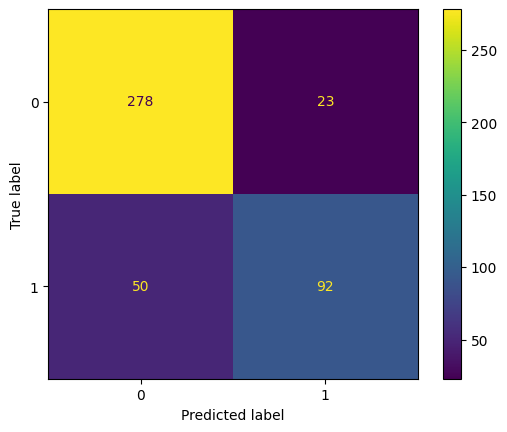

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val, y_pred)
ax = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
ax.plot()
plt.show()

### Обучение нейросетей

In [15]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import time
from sklearn.preprocessing import MinMaxScaler

Масштабирование категриальных признаков для нейросетей

In [16]:
columns = ['Application mode', 'Course', "Mother's qualification", "Father's qualification",
          "Mother's occupation", "Father's occupation"]
scaler = MinMaxScaler()
X_train[columns] = scaler.fit_transform(X_train[columns])
X_val[columns] = scaler.fit_transform(X_val[columns])
X_test[columns] = scaler.fit_transform(X_test[columns])

#### Модель 1

In [63]:
model_1 = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_1.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy', keras.metrics.AUC(name='auc')])

start_time = time.time()
history_1 = model_1.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=40,
                        batch_size=32,
                        verbose=1)
end_time = time.time()
print(f'Время обучения: {end_time - start_time:.3f} секунд')


Epoch 1/40
97/97 [==============================] - 1s 5ms/step - loss: 0.5699 - accuracy: 0.7096 - auc: 0.7148 - val_loss: 0.4823 - val_accuracy: 0.7675 - val_auc: 0.8641
Epoch 2/40
97/97 [==============================] - 0s 2ms/step - loss: 0.4615 - accuracy: 0.8059 - auc: 0.8369 - val_loss: 0.4210 - val_accuracy: 0.8014 - val_auc: 0.8858
Epoch 3/40
97/97 [==============================] - 0s 2ms/step - loss: 0.4120 - accuracy: 0.8324 - auc: 0.8640 - val_loss: 0.4033 - val_accuracy: 0.8217 - val_auc: 0.8929
Epoch 4/40
97/97 [==============================] - 0s 2ms/step - loss: 0.3939 - accuracy: 0.8379 - auc: 0.8752 - val_loss: 0.3835 - val_accuracy: 0.8172 - val_auc: 0.8979
Epoch 5/40
97/97 [==============================] - 0s 2ms/step - loss: 0.3769 - accuracy: 0.8453 - auc: 0.8854 - val_loss: 0.3743 - val_accuracy: 0.8262 - val_auc: 0.9023
Epoch 6/40
97/97 [==============================] - 1s 6ms/step - loss: 0.3755 - accuracy: 0.8417 - auc: 0.8839 - val_loss: 0.3684 - val_acc

Визуализация

In [34]:
print(history_1.history.keys())

dict_keys(['loss', 'accuracy', 'auc', 'val_loss', 'val_accuracy', 'val_auc'])


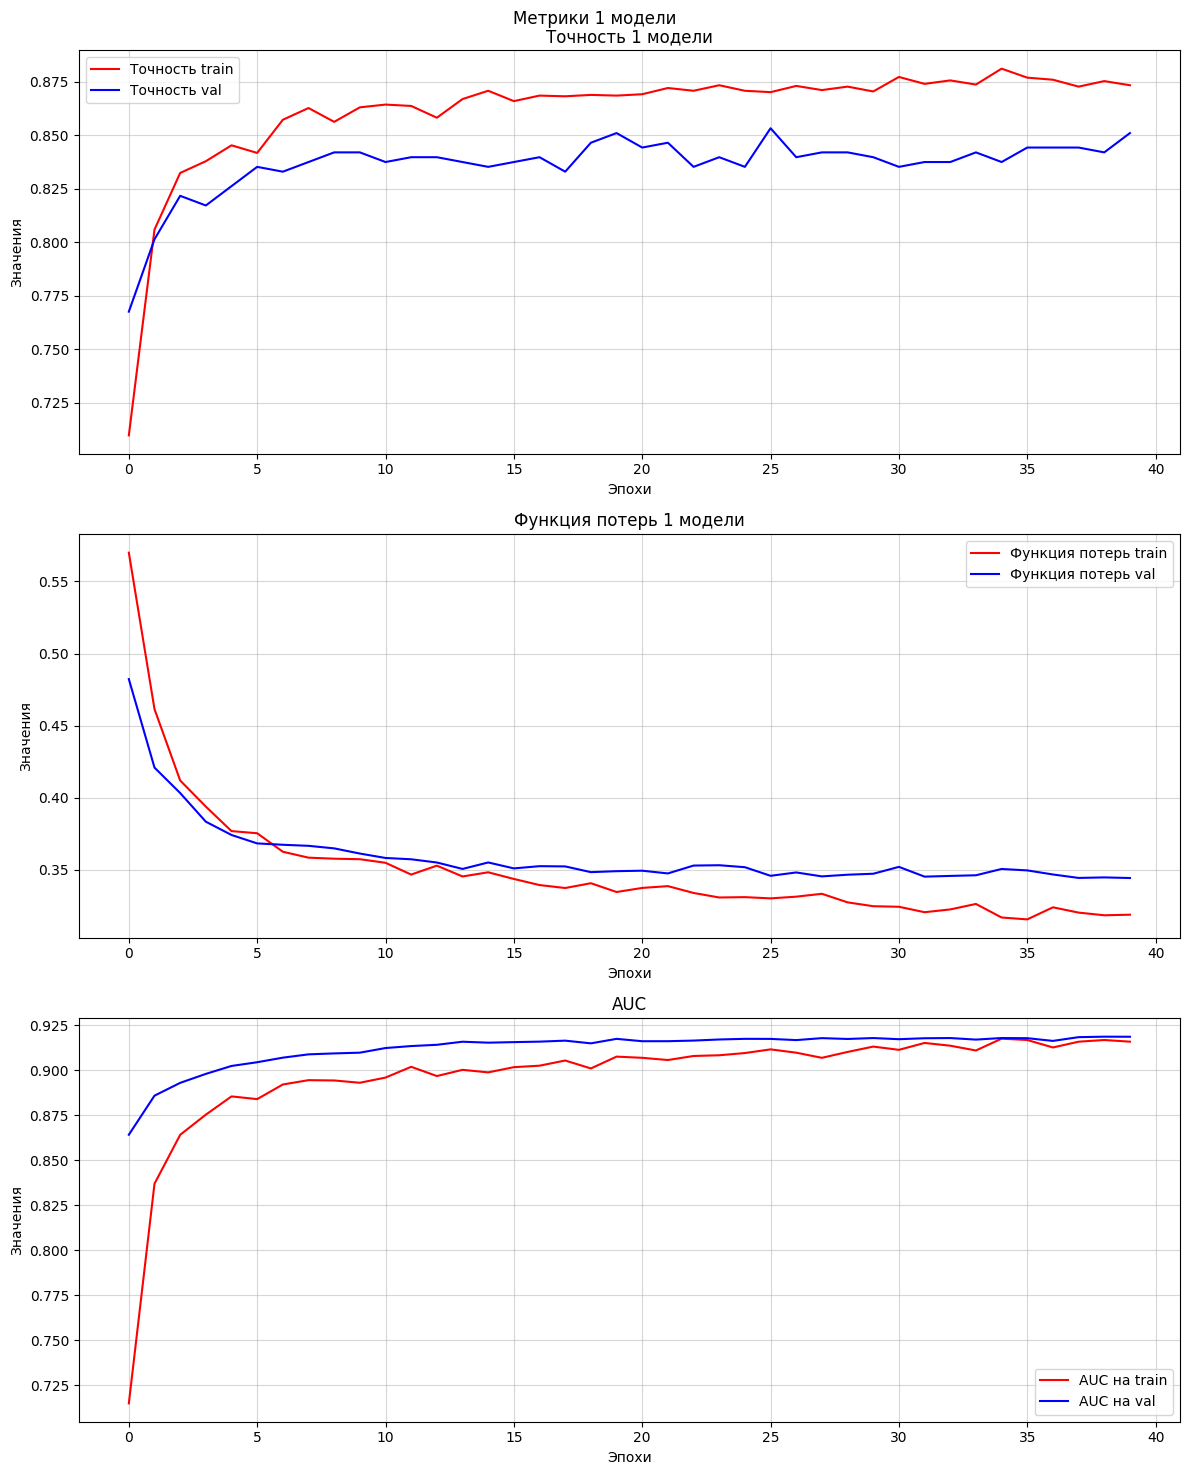

In [64]:
plt.figure(figsize=(12,15))
plt.suptitle('Метрики 1 модели')

plt.subplot(3,1,1)
plt.plot(history_1.history['accuracy'], color='red', label='Точность train')
plt.plot(history_1.history['val_accuracy'], color='blue', label='Точность val')
plt.title('Точность 1 модели')
plt.xlabel('Эпохи')
plt.ylabel('Значения')
plt.grid(alpha=0.5)
plt.legend()

plt.subplot(3,1,2)
plt.plot(history_1.history['loss'], color='red', label='Функция потерь train')
plt.plot(history_1.history['val_loss'], color='blue', label='Функция потерь val')
plt.title('Функция потерь 1 модели')
plt.xlabel('Эпохи')
plt.ylabel('Значения')
plt.grid(alpha=0.5)
plt.legend()

plt.subplot(3,1,3)
plt.plot(history_1.history['auc'], color='red', label='AUC на train')
plt.plot(history_1.history['val_auc'], color='blue', label='AUC на val')
plt.title('AUC')
plt.xlabel('Эпохи')
plt.ylabel('Значения')
plt.grid(alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()

#### Модель 2

In [61]:
model_2 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_2.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy', keras.metrics.AUC(name='auc')])

start_time = time.time()
history_2 = model_2.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=40,
                        batch_size=32,
                        verbose=1)
end_time = time.time()
print(f'Время обучения: {end_time - start_time:.3f} секунд')

Epoch 1/40
97/97 [==============================] - 1s 5ms/step - loss: 0.5784 - accuracy: 0.6935 - auc: 0.6955 - val_loss: 0.4860 - val_accuracy: 0.7788 - val_auc: 0.8578
Epoch 2/40
97/97 [==============================] - 0s 3ms/step - loss: 0.4514 - accuracy: 0.8172 - auc: 0.8387 - val_loss: 0.4104 - val_accuracy: 0.8059 - val_auc: 0.8826
Epoch 3/40
97/97 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.8366 - auc: 0.8641 - val_loss: 0.3905 - val_accuracy: 0.8126 - val_auc: 0.8923
Epoch 4/40
97/97 [==============================] - 0s 2ms/step - loss: 0.3877 - accuracy: 0.8472 - auc: 0.8753 - val_loss: 0.3812 - val_accuracy: 0.8239 - val_auc: 0.8989
Epoch 5/40
97/97 [==============================] - 0s 2ms/step - loss: 0.3777 - accuracy: 0.8466 - auc: 0.8834 - val_loss: 0.3781 - val_accuracy: 0.8284 - val_auc: 0.9028
Epoch 6/40
97/97 [==============================] - 0s 2ms/step - loss: 0.3650 - accuracy: 0.8537 - auc: 0.8913 - val_loss: 0.3676 - val_acc

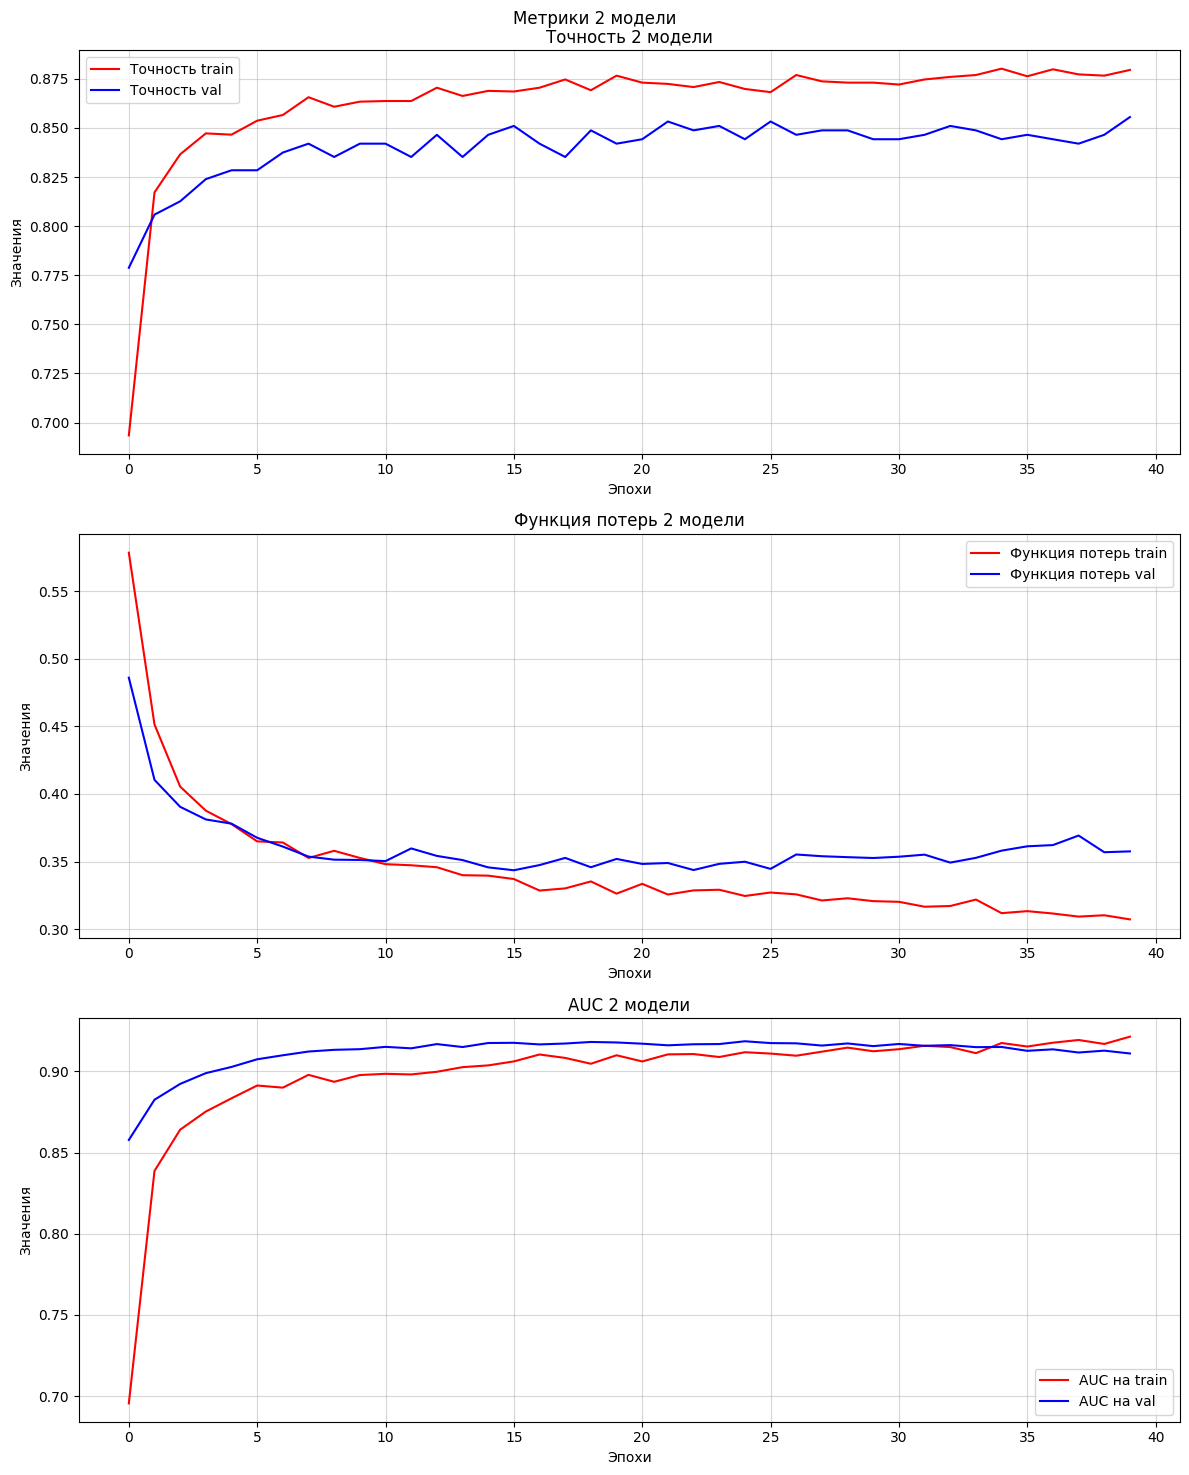

In [62]:
plt.figure(figsize=(12,15))
plt.suptitle('Метрики 2 модели')

plt.subplot(3,1,1)
plt.plot(history_2.history['accuracy'], color='red', label='Точность train')
plt.plot(history_2.history['val_accuracy'], color='blue', label='Точность val')
plt.title('Точность 2 модели')
plt.xlabel('Эпохи')
plt.ylabel('Значения')
plt.grid(alpha=0.5)
plt.legend()

plt.subplot(3,1,2)
plt.plot(history_2.history['loss'], color='red', label='Функция потерь train')
plt.plot(history_2.history['val_loss'], color='blue', label='Функция потерь val')
plt.title('Функция потерь 2 модели')
plt.xlabel('Эпохи')
plt.ylabel('Значения')
plt.grid(alpha=0.5)
plt.legend()

plt.subplot(3,1,3)
plt.plot(history_2.history['auc'], color='red', label='AUC на train')
plt.plot(history_2.history['val_auc'], color='blue', label='AUC на val')
plt.title('AUC 2 модели')
plt.xlabel('Эпохи')
plt.ylabel('Значения')
plt.grid(alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()

#### Модель 3

In [65]:
model_3 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.4),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_3.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy', keras.metrics.AUC(name='auc')])

start_time = time.time()
history_3 = model_3.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=40,
                        batch_size=32,
                        verbose=1)
end_time = time.time()
print(f'Время обучения: {end_time - start_time:.3f} секунд')

Epoch 1/40
97/97 [==============================] - 1s 5ms/step - loss: 0.6080 - accuracy: 0.6806 - auc: 0.6277 - val_loss: 0.5193 - val_accuracy: 0.7020 - val_auc: 0.8781
Epoch 2/40
97/97 [==============================] - 0s 2ms/step - loss: 0.5101 - accuracy: 0.7626 - auc: 0.7935 - val_loss: 0.4425 - val_accuracy: 0.7946 - val_auc: 0.8843
Epoch 3/40
97/97 [==============================] - 0s 2ms/step - loss: 0.4458 - accuracy: 0.8149 - auc: 0.8407 - val_loss: 0.3948 - val_accuracy: 0.8307 - val_auc: 0.8905
Epoch 4/40
97/97 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.8330 - auc: 0.8620 - val_loss: 0.3856 - val_accuracy: 0.8284 - val_auc: 0.8959
Epoch 5/40
97/97 [==============================] - 0s 2ms/step - loss: 0.4073 - accuracy: 0.8414 - auc: 0.8629 - val_loss: 0.3800 - val_accuracy: 0.8239 - val_auc: 0.8999
Epoch 6/40
97/97 [==============================] - 0s 2ms/step - loss: 0.3944 - accuracy: 0.8459 - auc: 0.8734 - val_loss: 0.3793 - val_acc

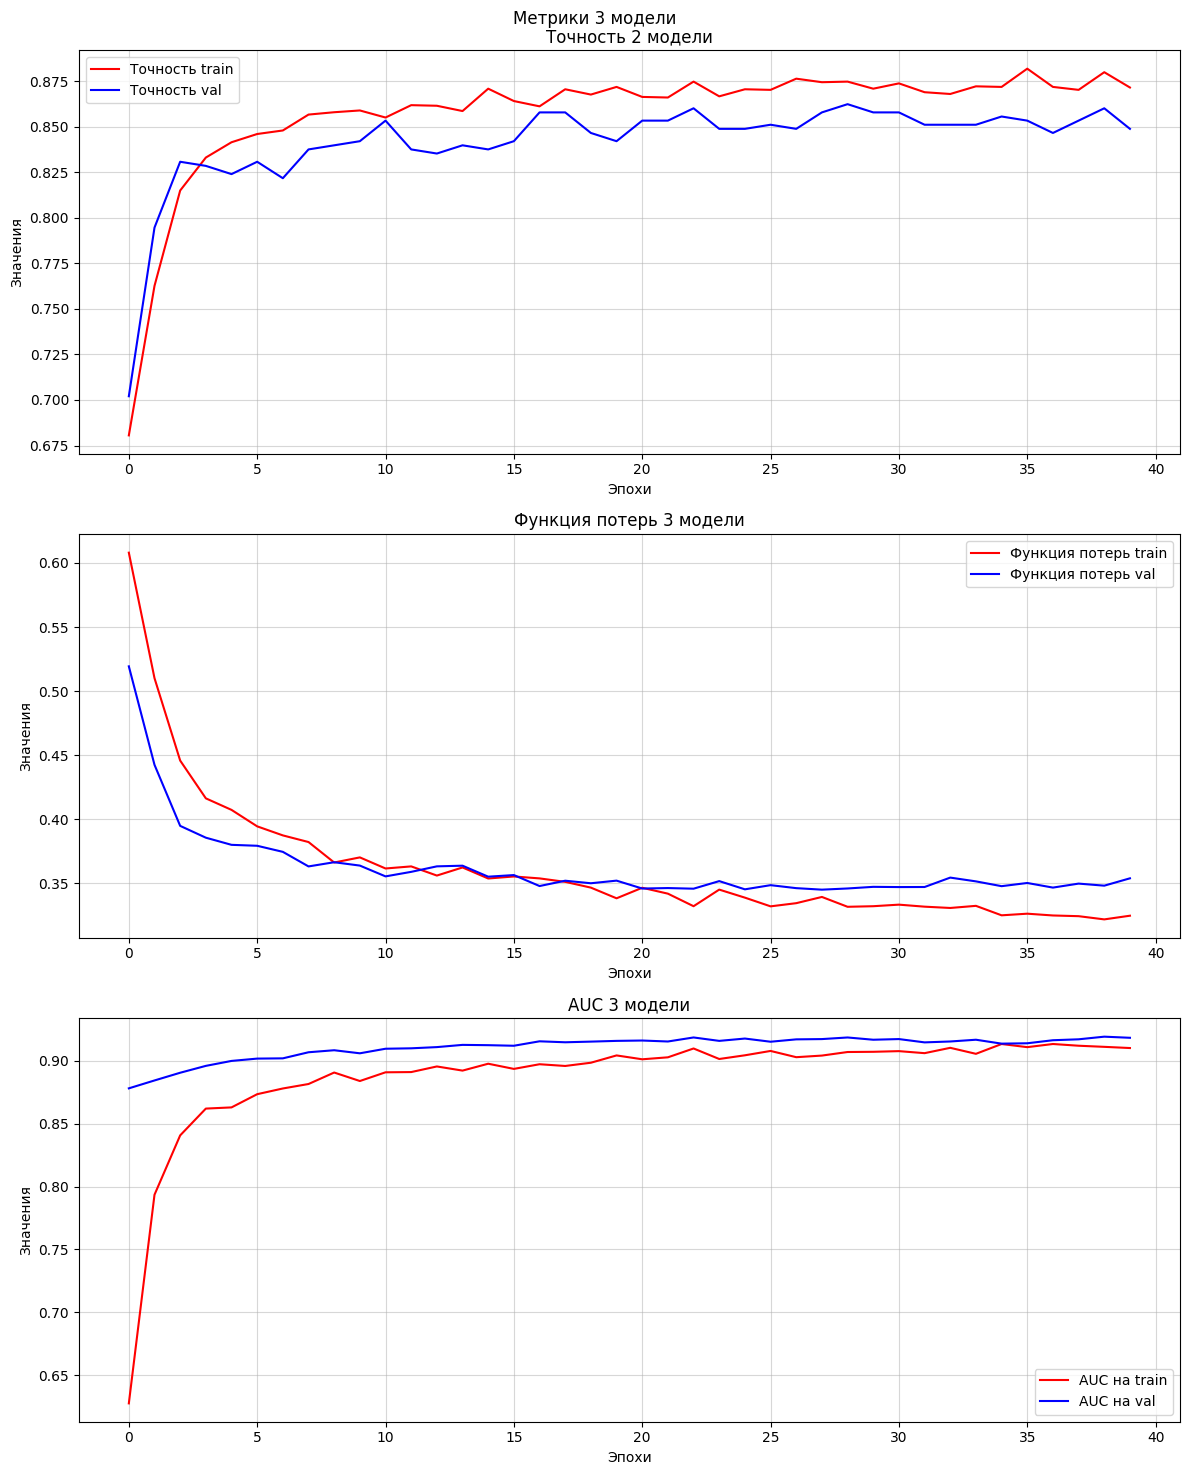

In [66]:
plt.figure(figsize=(12,15))
plt.suptitle('Метрики 3 модели')

plt.subplot(3,1,1)
plt.plot(history_3.history['accuracy'], color='red', label='Точность train')
plt.plot(history_3.history['val_accuracy'], color='blue', label='Точность val')
plt.title('Точность 2 модели')
plt.xlabel('Эпохи')
plt.ylabel('Значения')
plt.grid(alpha=0.5)
plt.legend()

plt.subplot(3,1,2)
plt.plot(history_3.history['loss'], color='red', label='Функция потерь train')
plt.plot(history_3.history['val_loss'], color='blue', label='Функция потерь val')
plt.title('Функция потерь 3 модели')
plt.xlabel('Эпохи')
plt.ylabel('Значения')
plt.grid(alpha=0.5)
plt.legend()

plt.subplot(3,1,3)
plt.plot(history_3.history['auc'], color='red', label='AUC на train')
plt.plot(history_3.history['val_auc'], color='blue', label='AUC на val')
plt.title('AUC 3 модели')
plt.xlabel('Эпохи')
plt.ylabel('Значения')
plt.grid(alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()